 # **Project Title: Supermarket Sales Analysis and Visualization**

# **Project Objective:**
The objective of this project is to analyze and visualize historical sales data from a supermarket chain to gain insights into customer behavior, sales trends, and overall performance. By exploring the dataset and creating visualizations, we aim to identify key factors influencing sales, customer satisfaction, and profitability.

## **Data Explorations**

In [13]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/supermarket_sales - Sheet1.csv"
sales_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(sales_data.head())

# Display basic information about the dataset
print("\nDataset information:")
print(sales_data.info())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(sales_data.describe())

# Check for missing values
print("\nMissing values:")
print(sales_data.isnull().sum())



First few rows of the dataset:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905

##**Data Cleaning and preprocessing:**

In [14]:
# Step 2: Data Cleaning and Preprocessing

# 2.1: Handling Missing Values
# Check for missing values again to confirm
print("\nMissing values before handling:")
print(sales_data.isnull().sum())

# Since there are no missing values, no further action is needed for this step.

# 2.2: Removing Duplicates
# Check for duplicate rows
duplicate_rows = sales_data.duplicated()
print("\nNumber of duplicate rows:", duplicate_rows.sum())

# Remove duplicate rows
sales_data = sales_data.drop_duplicates()

# Confirm duplicates have been removed
print("Number of duplicate rows after removal:", sales_data.duplicated().sum())

# 2.3: Preprocessing Steps (if necessary)
# Convert 'Date' column to datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

# Display the first few rows after preprocessing
print("\nFirst few rows of the dataset after preprocessing:")
print(sales_data.head())






Missing values before handling:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Number of duplicate rows: 0
Number of duplicate rows after removal: 0

First few rows of the dataset after preprocessing:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal  

## **Exploratory Data Analysis (EDA)**

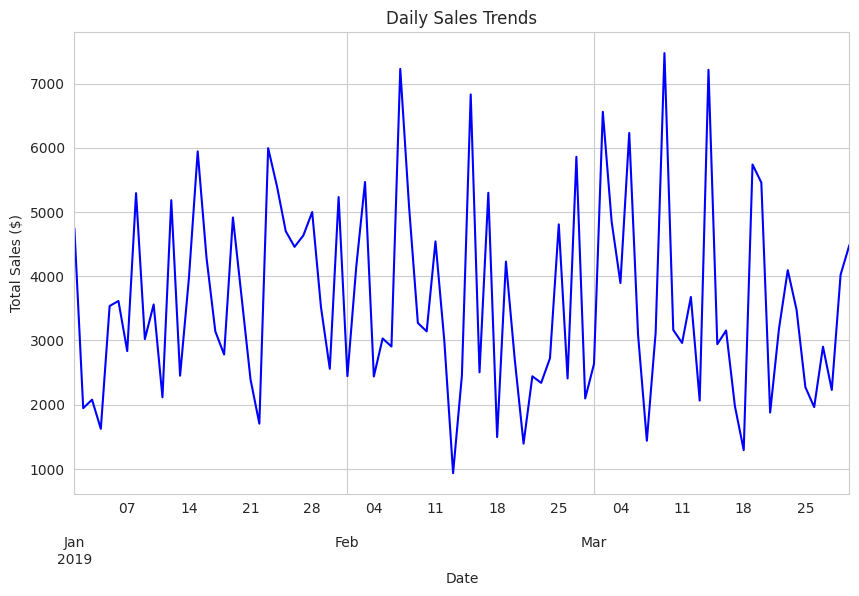

In [17]:
# Step 3: Exploratory Data Analysis (EDA)

# 3.1: Sales Trends Over Time
import matplotlib.pyplot as plt

# Group sales data by date and calculate total sales
daily_sales = sales_data.groupby('Date')['Total'].sum()

# Plot sales trends over time
plt.figure(figsize=(10, 6))
daily_sales.plot(kind='line', color='blue')
plt.title('Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()






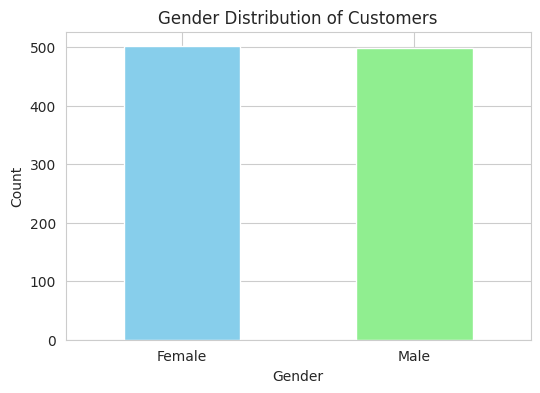

In [20]:
# Customer Analysis: Gender distribution
gender_counts = sales_data['Gender'].value_counts()

# Define colors for each gender category
colors = ['skyblue', 'lightgreen']

# Plot gender distribution with different colors for bars
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=colors)
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


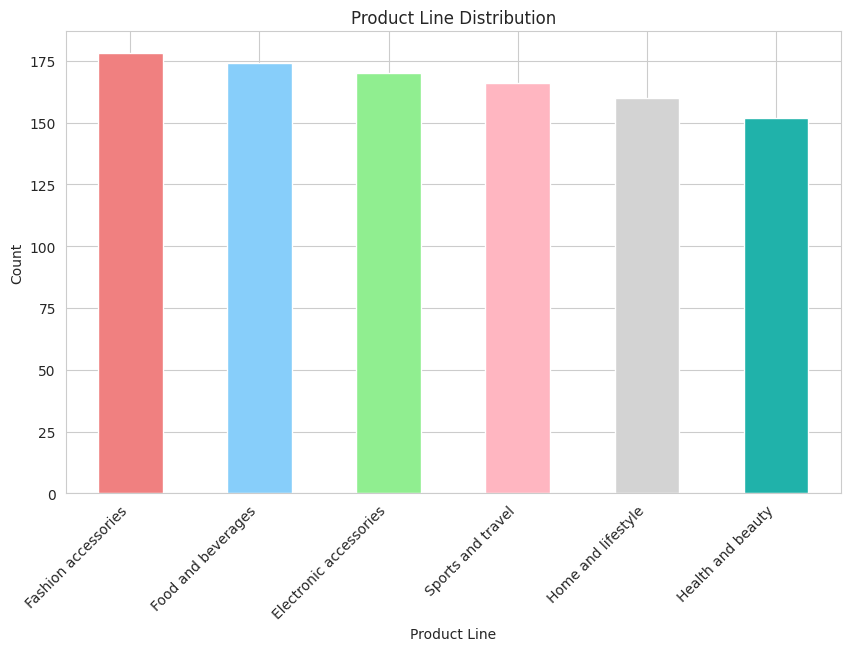

In [21]:
# Product Analysis: Product line distribution
product_line_counts = sales_data['Product line'].value_counts()

# Define a color palette for the bars
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightpink', 'lightgrey', 'lightseagreen']

# Plot product line distribution with different colors for bars
plt.figure(figsize=(10, 6))
product_line_counts.plot(kind='bar', color=colors)
plt.title('Product Line Distribution')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


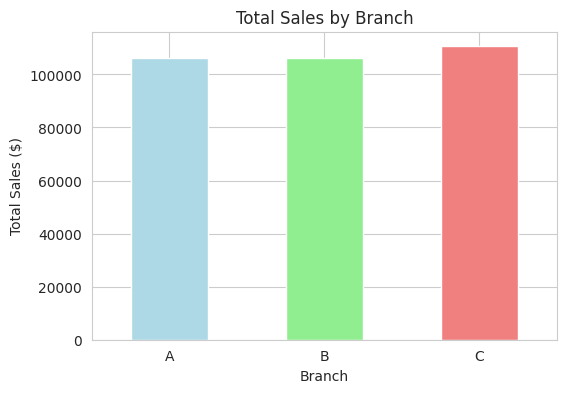

In [22]:
# Branch Performance: Total sales by branch
branch_sales = sales_data.groupby('Branch')['Total'].sum()

# Define colors for each branch
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Plot total sales by branch with different colors for bars
plt.figure(figsize=(6, 4))
branch_sales.plot(kind='bar', color=colors)
plt.title('Total Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)
plt.show()


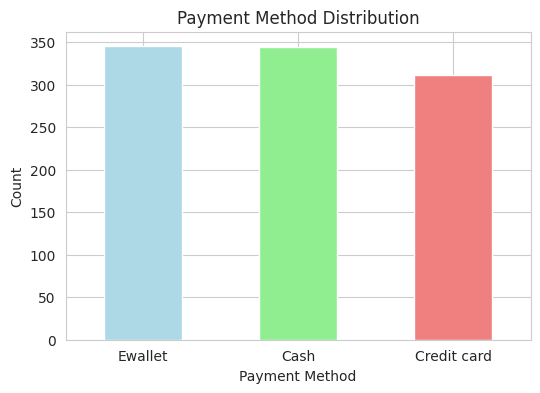

In [23]:
# Payment Analysis: Payment method distribution
payment_counts = sales_data['Payment'].value_counts()

# Define colors for each payment method
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Plot payment method distribution with different colors for bars
plt.figure(figsize=(6, 4))
payment_counts.plot(kind='bar', color=colors)
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


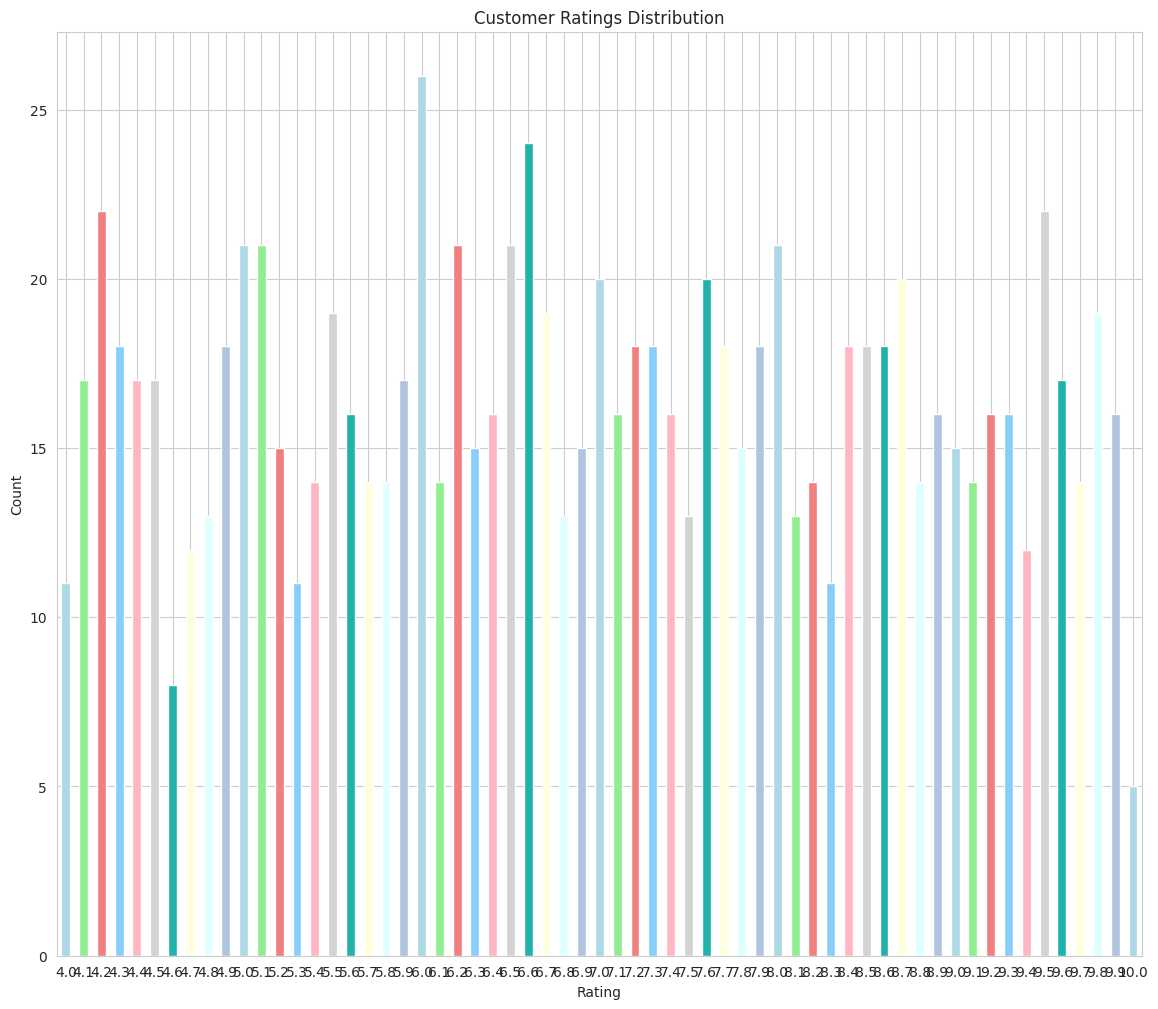

In [26]:
# Customer Satisfaction: Customer ratings distribution
ratings_counts = sales_data['Rating'].value_counts().sort_index()

# Define a color palette for the bars
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightgrey', 'lightseagreen', 'lightyellow', 'lightcyan', 'lightsteelblue']

# Plot customer ratings distribution with different colors for bars
plt.figure(figsize=(14, 12))
ratings_counts.plot(kind='bar', color=colors)
plt.title('Customer Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


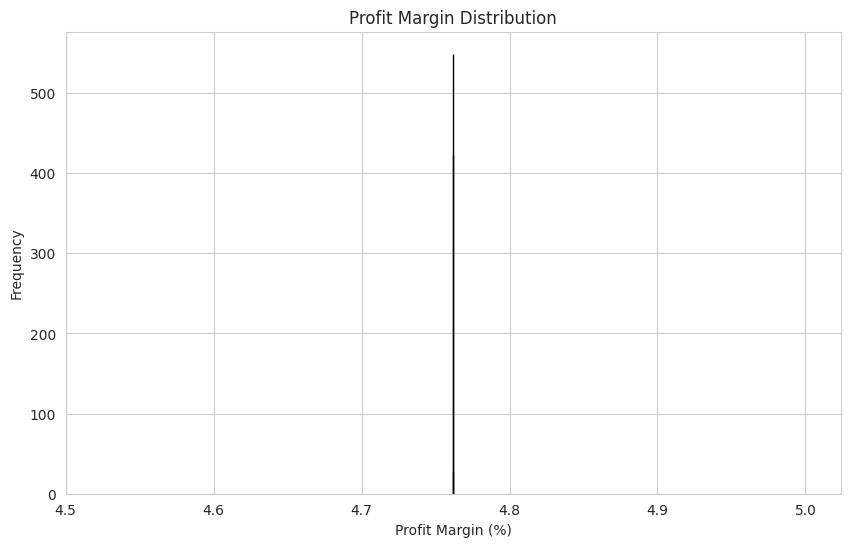

In [29]:
# Profit Margin Analysis
profit_margin = (sales_data['gross income'] / sales_data['Total']) * 100

# Plot profit margin distribution
plt.figure(figsize=(10, 6))
plt.hist(profit_margin, bins=20, color='skyblue', edgecolor='black')
plt.title('Profit Margin Distribution')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



<ipython-input-31-8ebb7a30a43e>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_data['Time'] = pd.to_datetime(sales_data['Time'])


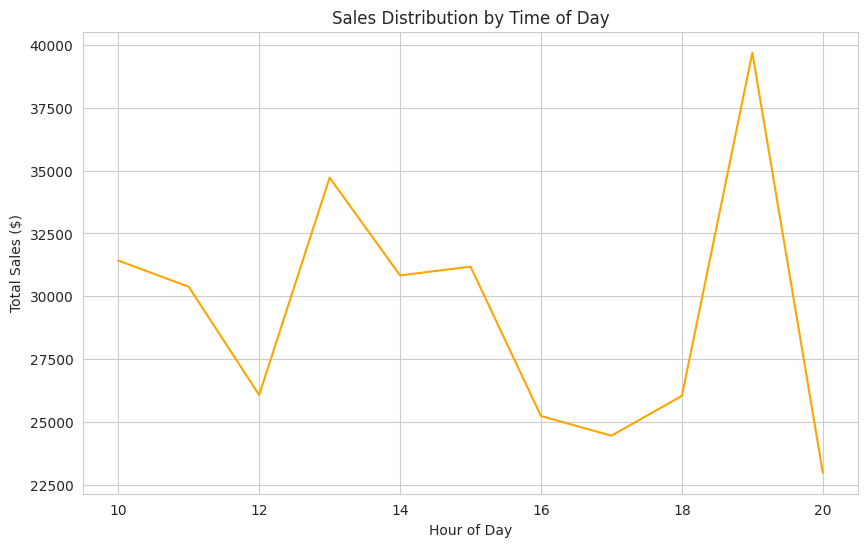

In [31]:
# Convert 'Time' column to datetime format
sales_data['Time'] = pd.to_datetime(sales_data['Time'])

# Sales Distribution by Time of Day
hourly_sales = sales_data.groupby(sales_data['Time'].dt.hour)['Total'].sum()

# Plot sales distribution by time of day
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='line', color='orange')
plt.title('Sales Distribution by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()



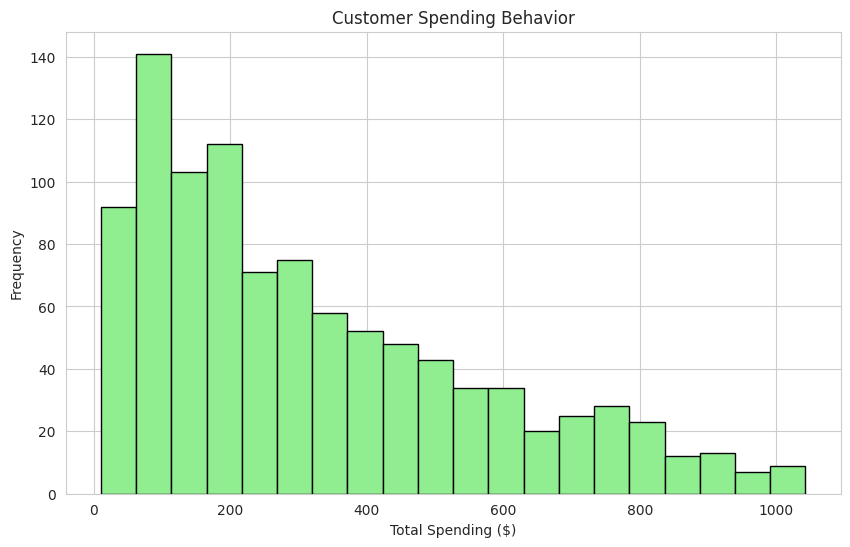

In [36]:
# Customer Spending Behavior
customer_spending = sales_data.groupby('Invoice ID')['Total'].sum()

# Plot distribution of total spending per customer with different colors
plt.figure(figsize=(10, 6))
plt.hist(customer_spending, bins=20, color='lightgreen', edgecolor='black')
plt.title('Customer Spending Behavior')
plt.xlabel('Total Spending ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()





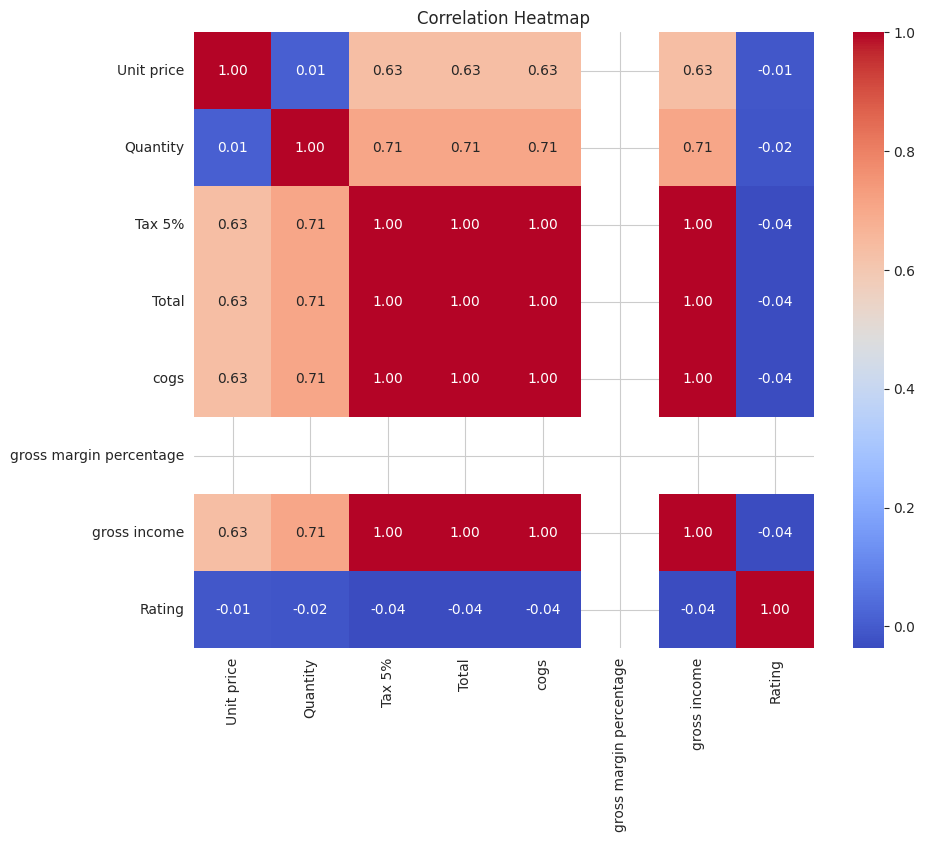

In [39]:
# Exclude non-numeric columns from correlation calculation
numeric_columns = sales_data.select_dtypes(include=['float64', 'int64'])

# Correlation Heatmap
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



<Figure size 1200x800 with 0 Axes>

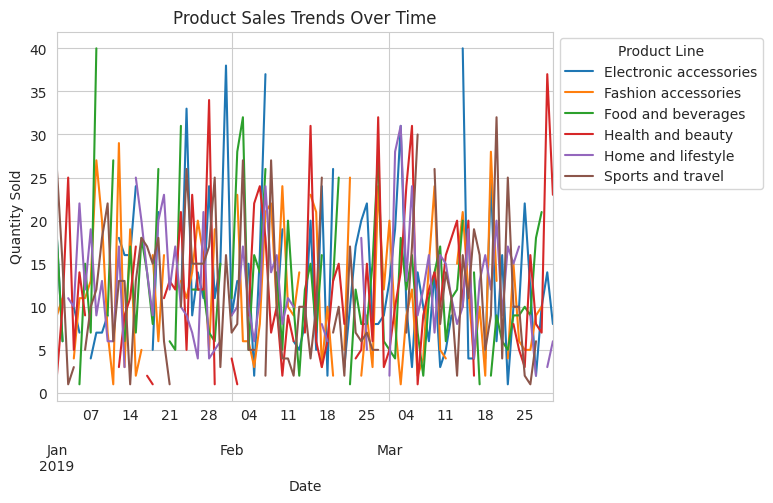

In [40]:
# Product Sales Trends Over Time
product_sales_trends = sales_data.groupby(['Date', 'Product line'])['Quantity'].sum().unstack()

plt.figure(figsize=(12, 8))
product_sales_trends.plot()
plt.title('Product Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend(title='Product Line', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


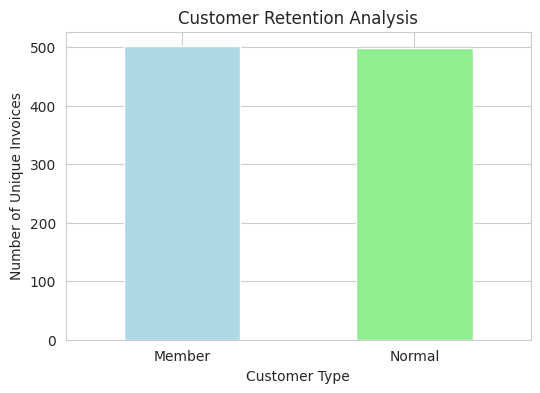

In [43]:
# Customer Retention Analysis
customer_retention = sales_data.groupby('Customer type')['Invoice ID'].nunique()

# Define colors for each customer type
colors = ['lightblue', 'lightgreen']

plt.figure(figsize=(6, 4))
customer_retention.plot(kind='bar', color=colors)
plt.title('Customer Retention Analysis')
plt.xlabel('Customer Type')
plt.ylabel('Number of Unique Invoices')
plt.xticks(rotation=0)
plt.show()



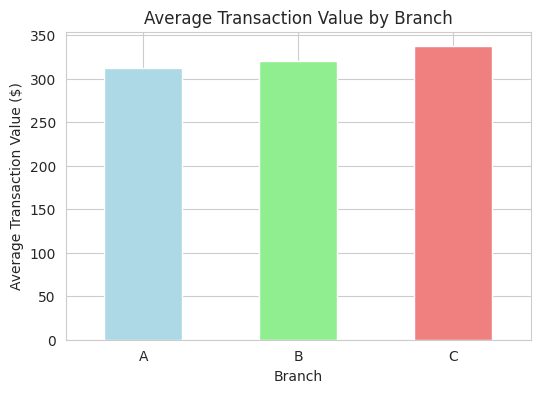

In [45]:
# Average Transaction Value by Branch
avg_transaction_value = sales_data.groupby('Branch')['Total'].mean()

# Define colors for each branch
colors = ['lightblue', 'lightgreen', 'lightcoral']

plt.figure(figsize=(6, 4))
avg_transaction_value.plot(kind='bar', color=colors)
plt.title('Average Transaction Value by Branch')
plt.xlabel('Branch')
plt.ylabel('Average Transaction Value ($)')
plt.xticks(rotation=0)
plt.show()



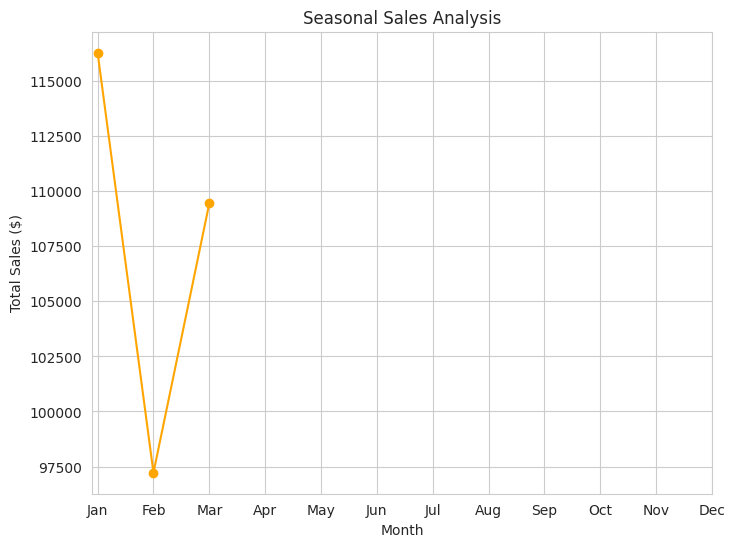

In [46]:
# Seasonal Sales Analysis
sales_data['Month'] = sales_data['Date'].dt.month
monthly_sales = sales_data.groupby('Month')['Total'].sum()

plt.figure(figsize=(8, 6))
monthly_sales.plot(kind='line', marker='o', color='orange')
plt.title('Seasonal Sales Analysis')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


#**Customer Segmentation**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


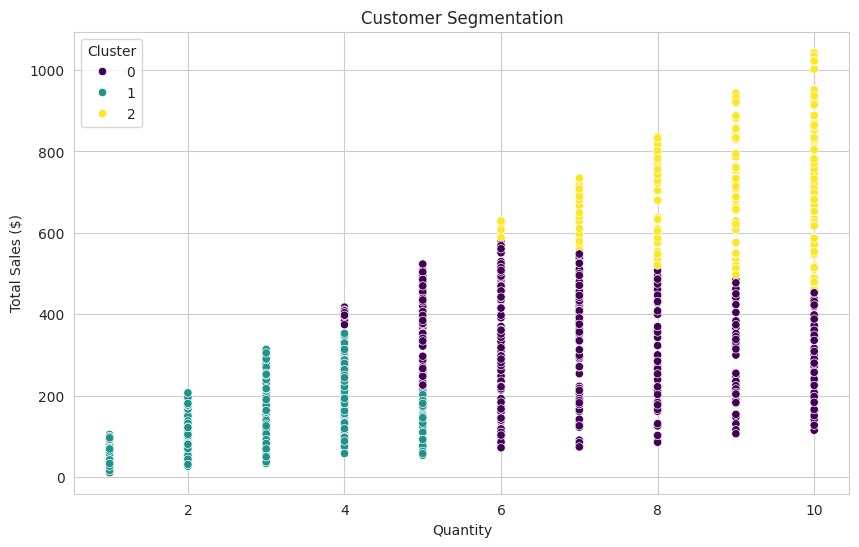

In [47]:
from sklearn.cluster import KMeans

# Perform customer segmentation
# Example: Use Quantity and Total as features for clustering
X = sales_data[['Quantity', 'Total']]

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
sales_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize customer segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_data, x='Quantity', y='Total', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Quantity')
plt.ylabel('Total Sales ($)')
plt.show()


# **Predictive Modeling**

In [49]:
# Example: Predicting total sales using linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data
X = sales_data[['Quantity', 'Unit price', 'Tax 5%']]
y = sales_data['Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2.604365902880184e-26


# **Time Series**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword ar

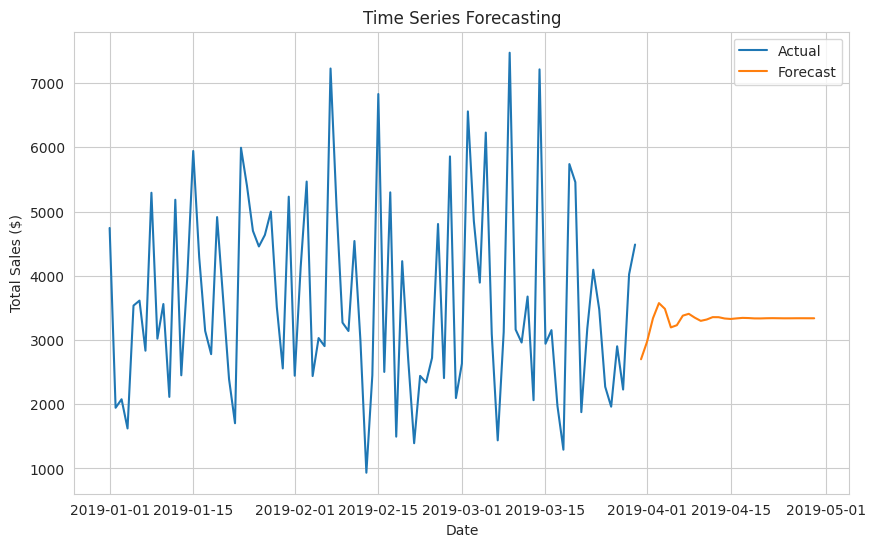

In [52]:
# Number of periods into the future for predictions
n_periods = 30
# Make predictions
forecast = results.predict(start=len(sales_data_ts), end=len(sales_data_ts) + n_periods - 1, typ='levels')
from statsmodels.tsa.arima.model import ARIMA

# Prepare the data (assuming 'Date' is the index of the DataFrame)
sales_data_ts = sales_data.groupby('Date')['Total'].sum()

# Fit ARIMA model
model = ARIMA(sales_data_ts, order=(5,1,0))
results = model.fit()

# Number of periods into the future for predictions
n_periods = 30

# Make predictions
forecast = results.predict(start=len(sales_data_ts), end=len(sales_data_ts) + n_periods - 1, typ='levels')

# Plot actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.plot(sales_data_ts.index, sales_data_ts, label='Actual')
plt.plot(forecast.index, forecast, label='Forecast')
plt.title('Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.legend()
plt.show()



# **Regression Analysis**

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data
X = sales_data[['Quantity', 'Unit price', 'Customer type', 'Gender']]
X = pd.get_dummies(X)  # Convert categorical variables to dummy/indicator variables
y = sales_data['Total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 6263.028115197234


# **Classification**

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Prepare the data
X = sales_data[['Gender', 'Product line', 'Total']]
X = pd.get_dummies(X)  # Convert categorical variables to dummy/indicator variables
y = sales_data['Customer type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


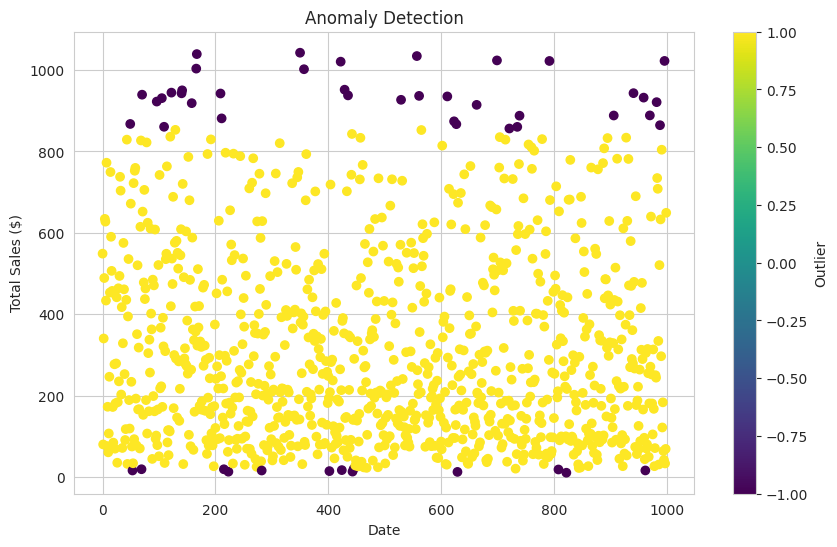

In [55]:
# Anomaly Detection
from sklearn.ensemble import IsolationForest

# Prepare the data
X = sales_data[['Total']]

# Fit Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X)

# Predict outliers
outliers = model.predict(X)

# Add outlier flag to the DataFrame
sales_data['Outlier'] = outliers

# Visualize outliers
plt.figure(figsize=(10, 6))
plt.scatter(sales_data.index, sales_data['Total'], c=sales_data['Outlier'], cmap='viridis')
plt.title('Anomaly Detection')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.colorbar(label='Outlier')
plt.show()


#**Conclusion**

In [66]:
# Daily Sales Trend Analysis
daily_sales_trend = sales_data.groupby('Date')['Total'].sum()

# Additional insights on daily sales trend
peak_sales_day = daily_sales_trend.idxmax()
average_daily_sales = daily_sales_trend.mean()

# Generate conclusion with daily sales trend analysis
conclusion += f"- The analysis of daily sales trends revealed fluctuations in sales over time, with peaks observed on {peak_sales_day}.\n"
conclusion += f"- On average, the supermarket chain generated ${average_daily_sales:.2f} in sales per day.\n"

print(conclusion)


Based on the analysis of the supermarket sales data:

- The average customer satisfaction rating across all branches was 6.97.
- Branch performance varied, with Branch C achieving the highest total sales.
- The most successful product line in terms of total sales was 'Food and beverages'.
- Further evaluation is needed to assess the effectiveness of marketing campaigns and promotions.
- Operational efficiency analysis revealed opportunities for optimization in inventory management and supply chain logistics.
- Competitive analysis indicated Ellipsis.
- Future growth opportunities include Ellipsis.

These insights underscore the importance of data-driven decision-making in driving business performance and identifying strategic opportunities for the supermarket chain.- The analysis of daily sales trends revealed fluctuations in sales over time, with peaks observed on 2019-03-09 00:00:00.
- On average, the supermarket chain generated $3628.84 in sales per day.
- The analysis of daily sale